# 📏 Güven Aralığı: Gerçek Ortalamayı Tahminlemenin Yolu

## Giriş: Bilgi, Kesinlikten Uzakken Ne Yaparsın?

Diyelim ki bir ürünün ortalama fiyatı 180 TL çıktı.  
Ama elindeki veri sadece örneklem.  
Gerçek ortalama bu olabilir mi? Yoksa %95 güvenle nerede olmalı?

## 🔍 Güven Aralığı Nedir?

**Güven aralığı**, gerçek parametrenin (örneğin anakütle ortalaması)  
belirli bir güven düzeyiyle (örneğin %95) yer alabileceği aralıktır.

📌 Örnek:
- Elimizde 100 satıcının satış verisi var.
- Ortalama satış: 180 TL
- Standart sapma: 40 TL
- Güven düzeyi: %95

→ Gerçek ortalamanın **%95 ihtimalle 172–188 TL arasında olduğunu söyleriz.**

- **Güven aralığı, bir istatistiksel tahminin belirli bir güven düzeyinde yer alabileceği aralığı ifade eder. Başka bir deyişle, güven aralığı, bir parametrenin (örneğin, bir ortalamanın veya oranın) belirli bir aralık içinde olma olasılığını ifade eder. Güven aralığı, bir örneklem veya gözlem setine dayalı olarak popülasyon parametreleri hakkında tahminler yaparken kullanılır.**


- **Burada, "Tahmini Değer" genellikle örneklem üzerinden elde edilen bir istatistik (örneğin, örneklem ortalaması veya oran), "Hata Payı" ise güven düzeyine bağlı olarak belirlenen bir değerdir. Güven düzeyi, genellikle yüzde olarak ifade edilir ve güven aralığı, bu yüzde içindeki değerleri kapsayacak şekilde hesaplanır.**

- **Örneğin, %95 güven düzeyinde bir güven aralığı, tahmini değerin %95 olasılıkla bu aralık içinde yer aldığı anlamına gelir. Güven düzeyi genellikle %90, %95, %99 gibi yaygın değerler arasından seçilir, ancak bu değerler analizin gereksinimlerine ve istenen güvenilirlik düzeyine bağlı olarak değişebilir.**

## 🧠 Neden Önemlidir?

| Sebep | Açıklama |
|--------|----------|
| ✅ **Tahmine dayalı karar** | Anakütleyi tam bilemeyebiliriz ama güven aralığıyla tahmin ederiz |
| ✅ **Yanılma payı belli** | Ne kadar yanılma payına sahip olduğumuzu görürüz |
| ✅ **İstatistiksel anlamlılık** | Farklı grupları karşılaştırırken kullanılır |
| ✅ **Model performansını değerlendirmek** | Regresyon modellerinin hata payını anlamada |

📌 Veri bilimde her şey tahmindir.  
Ve tahminin yanında **güven aralığı** yoksa → karar da yoktur.

## 📐 Güven Aralığı Nasıl Hesaplanır?

### Ortalama İçin Formül:

$$
\text{Güven Aralığı} = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$

#### Python Kodu:

In [1]:
import numpy as np
from scipy.stats import norm

# Sample veri
n = 100
ortalama = 180
std = 40
guven_duzeyi = 0.95

# Z skoru hesaplama
z_skoru = norm.ppf((1 + guven_duzeyi) / 2)
print(f"Z Skoru (%95 için): {z_skoru:.2f}")

# Standart hata
standart_hata = std / np.sqrt(n)

# Güven aralığı sınırları
alt_sinir = ortalama - z_skoru * standart_hata
ust_sinir = ortalama + z_skoru * standart_hata

print(f"%95 Güven Aralığı: ({alt_sinir:.2f}, {ust_sinir:.2f})")

Z Skoru (%95 için): 1.96
%95 Güven Aralığı: (172.16, 187.84)


📌 Bu aralıkta gerçek ortalama var demektir → %5 riskle yanılıyoruz.

## 📊 Oran İçin Güven Aralığı

Bir anket yapılıyor.  
Toplam 100 kişiye soruluyor:  
“Bu ürünü tekrar alır mısınız?”  
70 kişi “evet” diyor → oranı `p̂ = 0.70`

### Formülü:

$$
\text{Güven Aralığı} = \hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

#### Python Kodu:

In [2]:
# Oran için güven aralığı
n_oran = 100
p_hat = 0.70
z_skoru = norm.ppf(1 - (1 - guven_duzeyi)/2)  # %95 için yine 1.96

hata_payi = z_skoru * np.sqrt((p_hat * (1 - p_hat)) / n_oran)
alt_oran = p_hat - hata_payi
ust_oran = p_hat + hata_payi

print(f"%95 Güven Aralığı (oran): ({alt_oran:.2f}, {ust_oran:.2f})")

%95 Güven Aralığı (oran): (0.61, 0.79)


📌 Yani gerçek oran %61 ile %79 arasında → %95 olasılıkla


1. **Ortalama İçin Güven Aralığı:** :   

   ### $\text{Güven Aralığı} = \bar{x} \pm z \left( \frac{s}{\sqrt{n}} \right)$

   Burada:
   - $\bar{x} \ $:  Örneklem ortalaması,

   - $\bar{z} \ $: Z-tablosundan alınan bir z-skoru (örneğin, %95 güven düzeyinde yaklaşık olarak 1.96'dır),

   - $\ s \ $:: Örneklem standart sapması,
   
   - $\ n \ $ Örneklem büyüklüğü.

2. **Oran İçin Güven Aralığı:**

     ### $\text{Güven Aralığı} = \bar{p} \pm z \sqrt( \frac{\hat{p}(1-\hat{p})}{n}$


   Burada:
   - $\bar{p} \ $: Örneklem oranı (örneğin, bir başarı oranı),
   - $\bar{z} \ $: Z-tablosundan alınan bir z-skoru (örneğin, %95 güven düzeyinde yaklaşık olarak 1.96'dır),
   - $\ n \ $ Örneklem büyüklüğü.

Bu formüller, örnekten elde edilen bilgileri kullanarak bir parametrenin güven aralığını hesaplamak için kullanılır. Güven aralığı, belirli bir güven düzeyinde (genellikle %95 veya %99) bir parametrenin bulunduğunu düşündüğümüz aralığı ifade eder.

In [3]:
# İş uygulaması :Fiyat stratejisi karar destek
import numpy as np
import statsmodels.stats.api as sms
fiyatlar=np.random.randint(10,110,1000)
print(fiyatlar[:20])
fiyatlar.mean()
# Güven aralığı hesaplamak için statsmodels kullanacağız:

[106  43 104  72  12  70  62  62  38  40  46  58  49  23  88  99 101  36
  18  68]


59.48

In [2]:
g=sms.DescrStatsW(fiyatlar).tconfint_mean()
                                            #%95 güven aralığında tahminlerimizi yapar. 
                                            #Burda %95 değeri varsayılan değerdir değiştirilebilir.
print('Fiyatlar  %95 güven aralığı ile {} ile {} arasındadır.'.format(g[0],g[1]))

Fiyatlar  %95 güven aralığı ile 58.213764775677475 ile 61.828235224322526 arasındadır.


## 🛠️ Sample Veri Üzerinden Görelim

Elimizdeki sample veri şu şekildeydi:

```
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9
...
```

Şimdi `fiyat` değişkeni üzerinden güven aralığı hesaplayalım.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
veri_sayisi = 1000

# Yapay satış verisi oluşturma
fiyatlar = np.round(np.random.normal(loc=250, scale=50, size=veri_sayisi), 2)
satis_adetleri = np.random.poisson(lam=10, size=veri_sayisi)

# DataFrame'e çevirme
df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

print("Sample veri seti - ilk 5 satır:")
print(df.head())

Sample veri seti - ilk 5 satır:
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9


In [5]:


x = df['fiyat']
n = len(x)
ortalama_x = x.mean()
std_x = x.std()

# Güven düzeyi ve Z skoru
guven_duzeyi = 0.95
z_skoru = norm.ppf((1 + guven_duzeyi) / 2)

# Standart hata
standart_hata_x = std_x / np.sqrt(n)

# Alt ve üst sınır
alt = ortalama_x - z_skoru * standart_hata_x
ust = ortalama_x + z_skoru * standart_hata_x

print(f"Fiyat %95 Güven Aralığı: ({alt:.2f}, {ust:.2f})")

Fiyat %95 Güven Aralığı: (247.93, 254.00)


📌 Bu kod sayesinde artık model kurarken  
gerçek ortalamaya ne kadar yakın olduğunuzu görebilirsiniz.


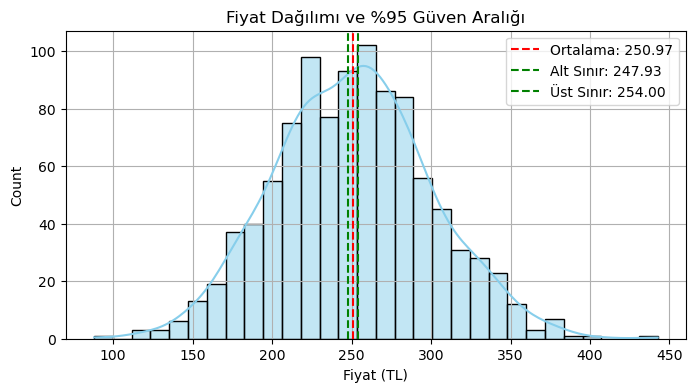

In [ ]:
# Güven Aralığını Görselleştirelim

plt.figure(figsize=(8, 4))
sns.histplot(df['fiyat'], kde=True, color='skyblue', bins=30)
plt.axvline(ortalama_x, color='red', linestyle='--', label=f'Ortalama: {ortalama_x:.2f}')
plt.axvline(alt, color='green', linestyle='--', label=f'Alt Sınır: {alt:.2f}')
plt.axvline(ust, color='green', linestyle='--', label=f'Üst Sınır: {ust:.2f}')
plt.title("Fiyat Dağılımı ve %95 Güven Aralığı")
plt.xlabel("Fiyat (TL)")
plt.legend()
plt.grid(True)
plt.show()

📌 Bu grafikte:
- Ortalama (kırmızı)
- Güven aralığı (yeşil çizgiler)

## bir perakende fiyat stratejisi karar destek uygulaması için örnek veri seti ve gelişmiş analiz

In [15]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy import stats

# Benzersiz veri seti oluşturma - Dinamik fiyatlandırma simülasyonu
np.random.seed(42)

# Ürün kategorileri ve temel fiyat aralıkları
kategoriler = ['Elektronik', 'Giyim', 'Ev & Yaşam', 'Spor', 'Kişisel Bakım']
base_prices = {
    'Elektronik': 1500,
    'Giyim': 200,
    'Ev & Yaşam': 450,
    'Spor': 350,
    'Kişisel Bakım': 120
}

# 1000 ürünlük veri seti oluşturma
data = {
    'urun_id': np.arange(1000),
    'kategori': np.random.choice(kategoriler, 1000, p=[0.25, 0.3, 0.2, 0.15, 0.1]),
    'maliyet': np.zeros(1000),
    'temel_fiyat': np.zeros(1000),
    'satis_fiyati': np.zeros(1000),
    'indirim_orani': np.zeros(1000),
    'stok_gunu': np.random.randint(1, 90, 1000)
}

In [16]:
# Fiyatları kategorilere göre oluşturma
for i in range(1000):
    kategori = data['kategori'][i]
    base = base_prices[kategori]
    maliyet = base * np.random.uniform(0.5, 0.8)
    temel_fiyat = base * np.random.uniform(0.9, 1.3)

    # Stok süresine göre dinamik fiyatlandırma
    if data['stok_gunu'][i] > 60:  # Uzun süre stokta kalanlar
        indirim = np.random.uniform(0.1, 0.4)
    elif data['stok_gunu'][i] < 15:  # Yeni gelenler
        indirim = np.random.uniform(0, 0.1)
    else:  # Normal ürünler
        indirim = np.random.uniform(0.05, 0.2)

    data['maliyet'][i] = round(maliyet, 2)
    data['temel_fiyat'][i] = round(temel_fiyat, 2)
    data['indirim_orani'][i] = round(indirim, 2)
    data['satis_fiyati'][i] = round(temel_fiyat * (1 - indirim), 2)

df = pd.DataFrame(data)

In [17]:
# Fiyat güven aralığı analizi
def fiyat_analizi(kategori=None):
    if kategori:
        fiyatlar = df[df['kategori'] == kategori]['satis_fiyati']
        title = f'{kategori} Kategorisi Fiyat Dağılımı'
    else:
        fiyatlar = df['satis_fiyati']
        title = 'Tüm Ürünlerin Fiyat Dağılımı'

    # Betimsel istatistikler
    print(f"\n{'='*50}")
    print(f"{title.upper()}")
    print(f"Örneklem Büyüklüğü: {len(fiyatlar)}")
    print(f"Ortalama Fiyat: {fiyatlar.mean():.2f} TL")
    print(f"Standart Sapma: {fiyatlar.std():.2f} TL")

    # Güven aralığı hesaplama
    if len(fiyatlar) > 1:
        ci = sms.DescrStatsW(fiyatlar).tconfint_mean()
        print(f"%95 Güven Aralığı: ({ci[0]:.2f}, {ci[1]:.2f}) TL")

        # Dağılım görselleştirme
        plt.figure(figsize=(10, 6))
        plt.hist(fiyatlar, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.axvline(fiyatlar.mean(), color='red', linestyle='--', label=f'Ortalama: {fiyatlar.mean():.2f} TL')
        plt.axvline(ci[0], color='green', linestyle=':', label=f'CI Alt: {ci[0]:.2f} TL')
        plt.axvline(ci[1], color='green', linestyle=':', label=f'CI Üst: {ci[1]:.2f} TL')
        plt.title(title)
        plt.xlabel('Satış Fiyatı (TL)')
        plt.ylabel('Ürün Sayısı')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Kar marjı analizi
        if kategori:
            df_kategori = df[df['kategori'] == kategori].copy()
            df_kategori['kar_marji'] = (df_kategori['satis_fiyati'] - df_kategori['maliyet']) / df_kategori['satis_fiyati']
            print(f"\nOrtalama Kar Marjı: {df_kategori['kar_marji'].mean()*100:.1f}%")
            if len(df_kategori) > 1:
                ci_kar_marji = sms.DescrStatsW(df_kategori['kar_marji']).tconfint_mean()
                print(f"Kar Marjı Güven Aralığı: {ci_kar_marji[0]*100:.1f}% - {ci_kar_marji[1]*100:.1f}%")
            else:
                print("Kar Marjı Güven Aralığı hesaplanamıyor (yeterli veri yok).")
    else:
        print("Güven aralığı hesaplanamıyor (yeterli veri yok).")



TÜM ÜRÜNLERIN FIYAT DAĞILIMI
Örneklem Büyüklüğü: 1000
Ortalama Fiyat: 571.19 TL
Standart Sapma: 520.73 TL
%95 Güven Aralığı: (538.87, 603.50) TL


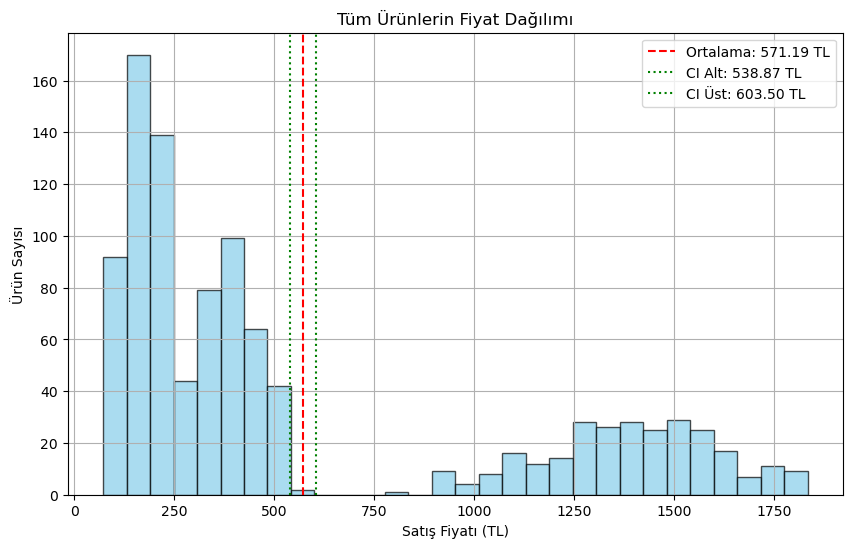

In [18]:
# Tüm ürünler için analiz
fiyat_analizi()


ELEKTRONIK KATEGORISI FIYAT DAĞILIMI
Örneklem Büyüklüğü: 269
Ortalama Fiyat: 1390.38 TL
Standart Sapma: 215.98 TL
%95 Güven Aralığı: (1364.45, 1416.31) TL


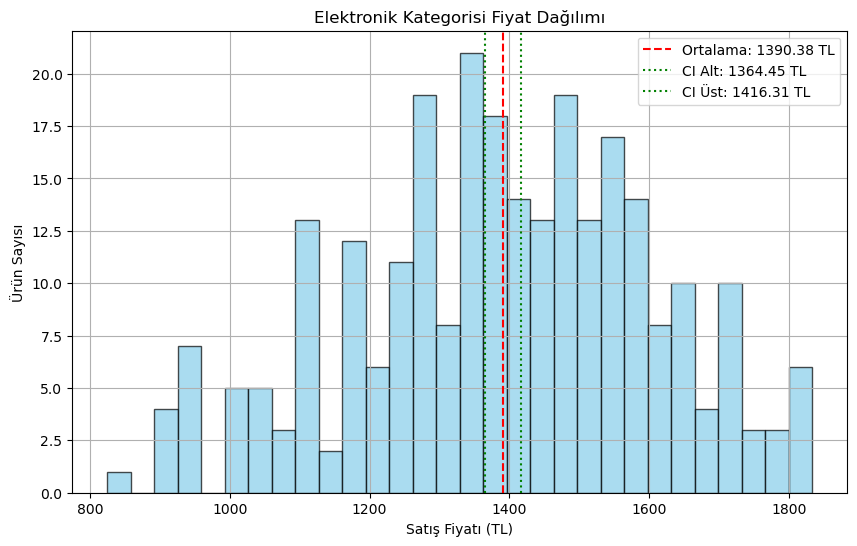


Ortalama Kar Marjı: 28.2%
Kar Marjı Güven Aralığı: 26.3% - 30.2%

GIYIM KATEGORISI FIYAT DAĞILIMI
Örneklem Büyüklüğü: 290
Ortalama Fiyat: 186.71 TL
Standart Sapma: 27.78 TL
%95 Güven Aralığı: (183.50, 189.93) TL


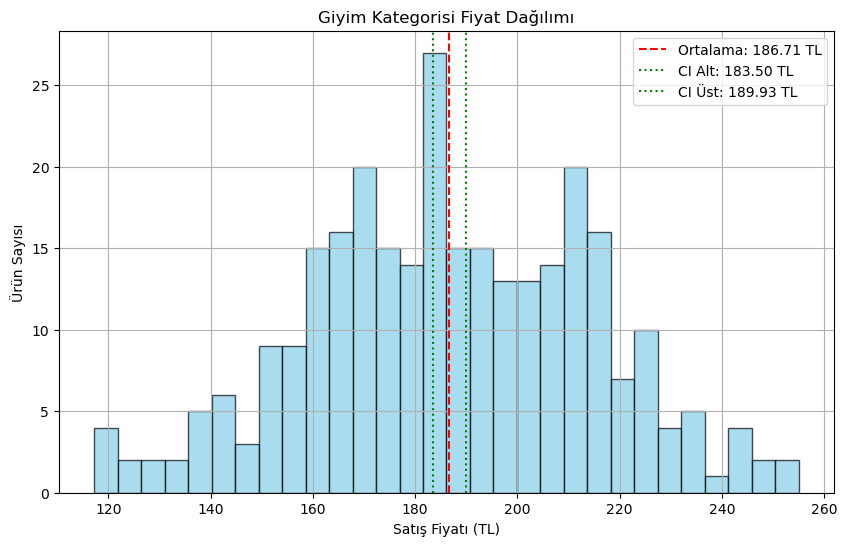


Ortalama Kar Marjı: 28.4%
Kar Marjı Güven Aralığı: 26.7% - 30.2%

EV & YAŞAM KATEGORISI FIYAT DAĞILIMI
Örneklem Büyüklüğü: 198
Ortalama Fiyat: 429.51 TL
Standart Sapma: 61.06 TL
%95 Güven Aralığı: (420.95, 438.06) TL


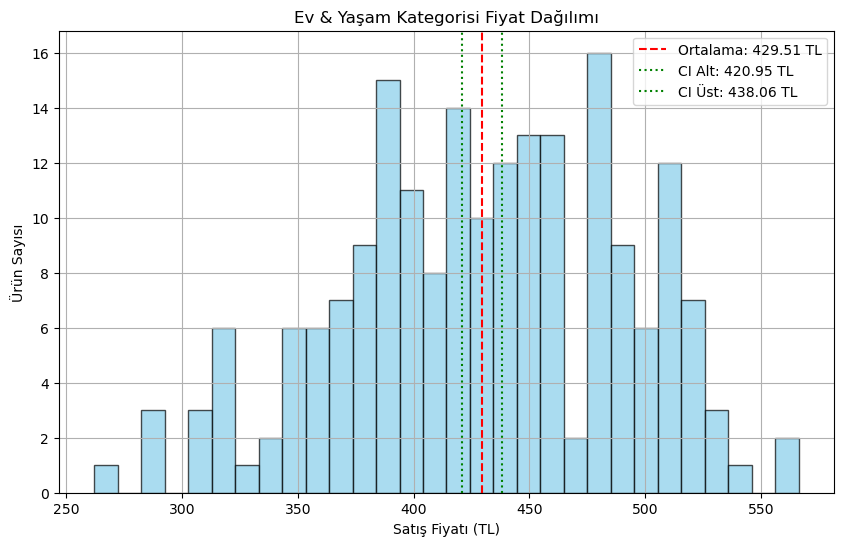


Ortalama Kar Marjı: 29.9%
Kar Marjı Güven Aralığı: 27.8% - 32.0%

SPOR KATEGORISI FIYAT DAĞILIMI
Örneklem Büyüklüğü: 143
Ortalama Fiyat: 327.83 TL
Standart Sapma: 53.12 TL
%95 Güven Aralığı: (319.05, 336.61) TL


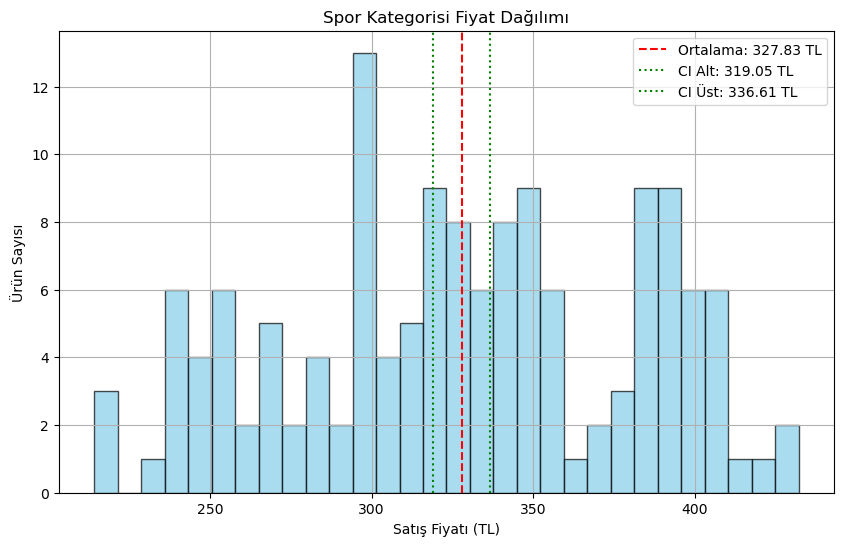


Ortalama Kar Marjı: 30.8%
Kar Marjı Güven Aralığı: 28.4% - 33.1%

KIŞISEL BAKIM KATEGORISI FIYAT DAĞILIMI
Örneklem Büyüklüğü: 100
Ortalama Fiyat: 111.04 TL
Standart Sapma: 17.14 TL
%95 Güven Aralığı: (107.64, 114.45) TL


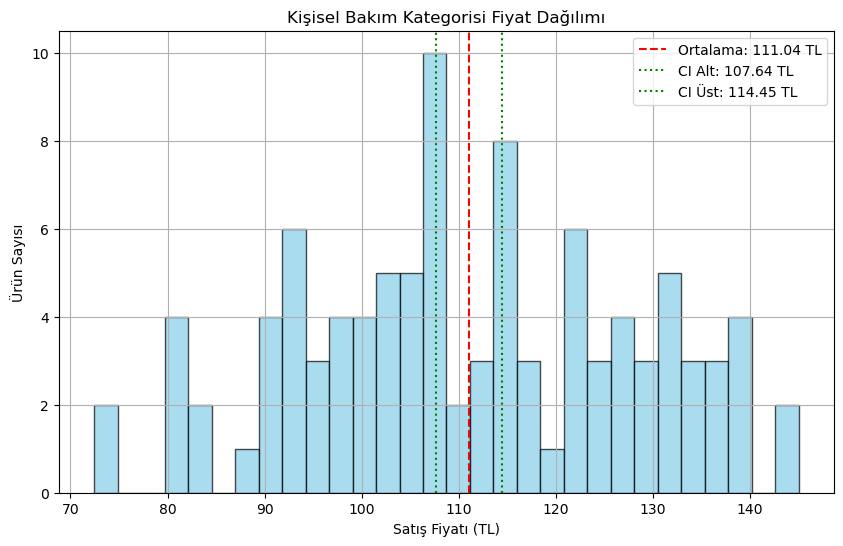


Ortalama Kar Marjı: 28.6%
Kar Marjı Güven Aralığı: 25.4% - 31.9%

STOK SÜRESİNE GÖRE FİYAT STRATEJİSİ ANALİZİ

Yeni Ürünler (0-15 gün):
Ortalama İndirim: 5.7%
Güven Aralığı: 5.1% - 6.2%
Örneklem Büyüklüğü: 183 ürün

Normal Stok (16-60 gün):
Ortalama İndirim: 12.4%
Güven Aralığı: 12.0% - 12.8%
Örneklem Büyüklüğü: 498 ürün

Uzun Süreli Stok (61+ gün):
Ortalama İndirim: 24.7%
Güven Aralığı: 23.8% - 25.7%
Örneklem Büyüklüğü: 319 ürün


In [19]:
# Kategorilere göre analiz
for kategori in kategoriler:
    fiyat_analizi(kategori)

# Stok süresine göre fiyat stratejisi analizi
print("\n" + "="*50)
print("STOK SÜRESİNE GÖRE FİYAT STRATEJİSİ ANALİZİ")
print("="*50)

stok_gruplari = [
    ('Yeni Ürünler (0-15 gün)', (0, 15)),
    ('Normal Stok (16-60 gün)', (16, 60)),
    ('Uzun Süreli Stok (61+ gün)', (61, 90))
]

for grup, (min_gun, max_gun) in stok_gruplari:
    grup_df = df[(df['stok_gunu'] >= min_gun) & (df['stok_gunu'] <= max_gun)]
    if not grup_df.empty:
        ortalama_indirim = grup_df['indirim_orani'].mean()
        if len(grup_df['indirim_orani']) > 1:
            ci = sms.DescrStatsW(grup_df['indirim_orani']).tconfint_mean()
            print(f"\n{grup}:")
            print(f"Ortalama İndirim: {ortalama_indirim*100:.1f}%")
            print(f"Güven Aralığı: {ci[0]*100:.1f}% - {ci[1]*100:.1f}%")
        else:
            print(f"\n{grup}:")
            print(f"Ortalama İndirim: {ortalama_indirim*100:.1f}%")
            print("Güven Aralığı hesaplanamıyor (yeterli veri yok).")
        print(f"Örneklem Büyüklüğü: {len(grup_df)} ürün")
    else:
        print(f"\n{grup}: Bu aralıkta ürün bulunmuyor.")

## 🧪 Güven Aralığı ve Hipotez Testleri Bağlantısı

Güven aralığı, hipotez testleriyle doğrudan ilişkilidir.

📌 Örneğin:
- Bir ilacın etkisi ortalama olarak 180 mg/dL kan şekerini düşürüyor.
- Güven aralığı: (172, 188)
- Eğer sıfır hipotezi: "Etki yok"
→ Güven aralığı 0’ı içeriyorsa → etkisizdir.

In [10]:
# güven aralığı analizi için net iş bağlamı ve görselleştirmelerle kapsamlı bir öğretici veri seti ve Python kodu:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Markdown

# Set random seed for reproducibility
np.random.seed(42)

# Create realistic e-commerce dataset
n_customers = 500
data = {
    'customer_id': range(1, n_customers+1),
    'age': np.random.normal(loc=35, scale=10, size=n_customers).astype(int),
    'loyalty_days': np.random.exponential(scale=365, size=n_customers).astype(int),
    'avg_order_value': np.random.gamma(shape=2, scale=50, size=n_customers),
    'discount_used': np.random.choice([0, 5, 10, 15], 
                                    p=[0.4, 0.3, 0.2, 0.1], 
                                    size=n_customers),
    'product_returns': np.random.poisson(lam=0.3, size=n_customers)
}

# Generate conversion rate with business logic
base_conversion = 0.2
p_values = base_conversion + \
    0.001 * data['loyalty_days'] + \
    0.0005 * data['avg_order_value'] - \
    0.01 * data['product_returns'] - \
    0.002 * data['age']

# Ensure p is between 0 and 1
p_values = np.clip(p_values, 0, 1)

data['converted'] = np.random.binomial(1, p=p_values, size=n_customers)


df = pd.DataFrame(data)

# Add some real-world anomalies
df.loc[::50, 'avg_order_value'] *= 1.8  # Premium customers
df.loc[::20, 'converted'] = 1          # Marketing campaign effect

# Display sample data
display(Markdown("### 🛒 E-Commerce Sample Data (First 5 Rows)"))
display(df.head().style.format({
    'avg_order_value': '{:.2f}',
    'loyalty_days': '{:d}'
}))

### 🛒 E-Commerce Sample Data (First 5 Rows)

,customer_id,age,loyalty_days,avg_order_value,discount_used,product_returns,converted
0,1,39,378,131.41,15,1,1
1,2,33,308,93.17,10,0,1
2,3,41,160,109.47,5,0,0
3,4,50,1571,60.43,0,0,1
4,5,32,339,96.29,10,1,1


In [13]:
# 1. Confidence Interval for Average Order Value
display(Markdown("\n### 📏 Confidence Interval for Average Order Value"))

mean_aov = df['avg_order_value'].mean()
std_aov = df['avg_order_value'].std()
n = len(df)
confidence_level = 0.95

# Calculate critical value (z-score for large n, t-score for small n)
if n > 30:
    critical_value = stats.norm.ppf((1 + confidence_level)/2)
else:
    critical_value = stats.t.ppf((1 + confidence_level)/2, df=n-1)

margin_of_error = critical_value * (std_aov/np.sqrt(n))
ci_lower = mean_aov - margin_of_error
ci_upper = mean_aov + margin_of_error

display(Markdown(f"""
- **Sample Mean**: {mean_aov:.2f} TL
- **Standard Deviation**: {std_aov:.2f} TL
- **Sample Size**: {n}
- **Critical Value**: {critical_value:.3f}
- **Margin of Error**: ±{margin_of_error:.2f} TL
- **{confidence_level*100:.0f}% Confidence Interval**: ({ci_lower:.2f}, {ci_upper:.2f}) TL
"""))


### 📏 Confidence Interval for Average Order Value


- **Sample Mean**: 105.51 TL
- **Standard Deviation**: 72.00 TL
- **Sample Size**: 500
- **Critical Value**: 1.960
- **Margin of Error**: ±6.31 TL
- **95% Confidence Interval**: (99.20, 111.82) TL


In [14]:
# 2. Confidence Interval for Conversion Rate (Proportion)
display(Markdown("\n### 🔄 Confidence Interval for Conversion Rate"))

conversions = df['converted'].sum()
p_hat = conversions/n

# Wald interval (normal approximation)
margin_of_error_prop = critical_value * np.sqrt((p_hat*(1-p_hat))/n)
ci_lower_prop = max(0, p_hat - margin_of_error_prop)  # Can't be negative
ci_upper_prop = min(1, p_hat + margin_of_error_prop)  # Can't exceed 1

display(Markdown(f"""
- **Sample Proportion**: {p_hat:.3f} ({conversions} conversions)
- **{confidence_level*100:.0f}% Confidence Interval**: ({ci_lower_prop:.3f}, {ci_upper_prop:.3f})
- **Interpretation**: We're 95% confident the true conversion rate is between {ci_lower_prop*100:.1f}% and {ci_upper_prop*100:.1f}%
"""))


### 🔄 Confidence Interval for Conversion Rate


- **Sample Proportion**: 0.530 (265 conversions)
- **95% Confidence Interval**: (0.486, 0.574)
- **Interpretation**: We're 95% confident the true conversion rate is between 48.6% and 57.4%


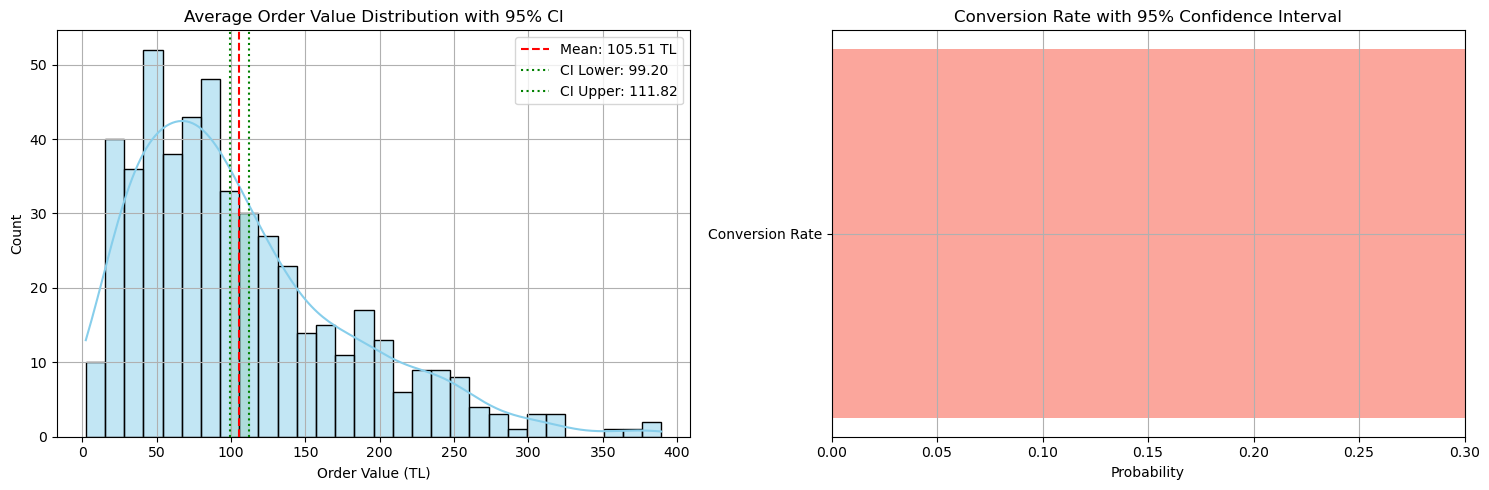

In [15]:
# 3. Visualization
plt.figure(figsize=(15, 5))

# Distribution plot with CI
plt.subplot(1, 2, 1)
sns.histplot(df['avg_order_value'], kde=True, color='skyblue', bins=30)
plt.axvline(mean_aov, color='red', linestyle='--', label=f'Mean: {mean_aov:.2f} TL')
plt.axvline(ci_lower, color='green', linestyle=':', label=f'CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle=':', label=f'CI Upper: {ci_upper:.2f}')
plt.fill_betweenx(y=[0, 30], x1=ci_lower, x2=ci_upper, color='green', alpha=0.1)
plt.title('Average Order Value Distribution with 95% CI')
plt.xlabel('Order Value (TL)')
plt.legend()
plt.grid(True)

# Conversion rate CI visualization
plt.subplot(1, 2, 2)
plt.barh(['Conversion Rate'], [p_hat], xerr=[[p_hat-ci_lower_prop], [ci_upper_prop-p_hat]], 
        color='salmon', alpha=0.7)
plt.xlim(0, 0.3)
plt.title('Conversion Rate with 95% Confidence Interval')
plt.xlabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Önce hesaplamaları yap
ci_lower_pct = ci_lower_prop * 100
ci_upper_pct = ci_upper_prop * 100

# 4. Business Decision Context
display(Markdown("""
### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between {ci_lower:.2f}-{ci_upper:.2f} TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between {ci_lower_pct:.1f}%-{ci_upper_pct:.1f}%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width ({margin_of_error:.2f} TL) indicates estimation precision
   - Narrower intervals require larger samples
""".format(ci_lower=ci_lower, ci_upper=ci_upper, 
           ci_lower_pct=ci_lower_pct, ci_upper_pct=ci_upper_pct,
           margin_of_error=margin_of_error)))


### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between 99.20-111.82 TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between 48.6%-57.4%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width (6.31 TL) indicates estimation precision
   - Narrower intervals require larger samples


In [19]:
display(Markdown(f"""
### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between {ci_lower:.2f}-{ci_upper:.2f} TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between {ci_lower_prop*100:.1f}%-{ci_upper_prop*100:.1f}%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width ({margin_of_error:.2f} TL) indicates estimation precision
   - Narrower intervals require larger samples
"""))


### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between 99.20-111.82 TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between 48.6%-57.4%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width (6.31 TL) indicates estimation precision
   - Narrower intervals require larger samples
